In [64]:
import matplotlib.pyplot as plt
import numpy as np
import yt
from astropy import units as u, constants  as const

pc = const.pc.cgs.value
kB  = const.k_B.cgs.value
Msun = const.M_sun.cgs.value
G = const.G.cgs.value
Myr = u.Myr.in_units("s")

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble" : r'\boldmath'
})

K_to_keV = 8.61732814974057e-8
K_to_keV = 8.625e-8


In [2]:
ds = yt.load("sim-files/SILCC_hdf5_plt_cnt_1080")

yt : [INFO     ] 2025-02-13 21:54:01,445 Parameters: current_time              = 340597785179995.1
yt : [INFO     ] 2025-02-13 21:54:01,446 Parameters: domain_dimensions         = [8 8 8]
yt : [INFO     ] 2025-02-13 21:54:01,447 Parameters: domain_left_edge          = [-7.715e+20 -7.715e+20 -7.715e+20]
yt : [INFO     ] 2025-02-13 21:54:01,448 Parameters: domain_right_edge         = [7.715e+20 7.715e+20 7.715e+20]
yt : [INFO     ] 2025-02-13 21:54:01,449 Parameters: cosmological_simulation   = 0


In [17]:
# radius of the bubble and center
radius=120
# c = ([-80, -150, 0], "pc") # only new version of YT
c = [-80*pc, -150*pc, 0*pc]

In [84]:
sphere = ds.sphere(c, (radius, "pc"))
dens = sphere[("gas","number_density")]
edens= sphere[("gas","number_density")]*sphere[("flash","ihp ")]
temp = sphere[("gas","temperature")]
tkeV = temp*K_to_keV
vol  = sphere[("gas","cell_volume")]
idx = np.where(temp > 1e4)
np_med = np.median(dens[idx])
ne_med = np.median(edens[idx])
Hp, edp = np.histogram(np.log10(dens[idx]),  bins=100, weights=vol[idx]/np.sum(vol[idx]))
He, ede = np.histogram(np.log10(edens[idx]), bins=100, weights=vol[idx]/np.sum(vol[idx]))
ctrp = 0.5*(edp[1:]+edp[:-1])
ctre = 0.5*(ede[1:]+ede[:-1])

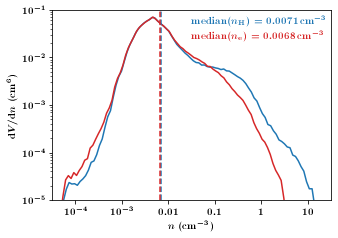

In [85]:
fig, ax = plt.subplots(figsize=(5,3.5))
ax.semilogy(ctrp, Hp, label="$n_\\mathrm{p}$", color="C0")
ax.semilogy(ctre, He, label="$n_\\mathrm{e}$", color="C3")
ax.set_xlabel("$n~(\\mathrm{cm}^{-3})$")
ax.set_ylabel("$\\mathrm{d}V/\\mathrm{d}n~(\\mathrm{cm}^{6})$")
ax.set_ylim(1e-5,1e-1)
ax.set_xlim(-4.5,1.5)
ax.set_xticks([-4,-3,-2,-1,0,1])
ax.set_xticklabels(["$10^{-4}$", "$10^{-3}$", "$0.01$", "$0.1$", "$1$", "$10$"])
ax.plot([np.log10(np_med),np.log10(np_med)],[1e-5,1e-1],ls="--",color="C0")
ax.text(-1.5, 5e-2, "$\\mathrm{median}(n_\\mathrm{H}) = "+str(np.round(np_med,4))+"\\,\\mathrm{cm}^{-3}$",color="C0")
ax.plot([np.log10(ne_med),np.log10(ne_med)],[1e-5,1e-1],ls="--",color="C3")
ax.text(-1.5, 2.5e-2, "$\\mathrm{median}(n_\\mathrm{e}) = "+str(np.round(ne_med,4))+"\\,\\mathrm{cm}^{-3}$",color="C3")
fig.savefig("plots/density-pdf.pdf", bbox_inches="tight")

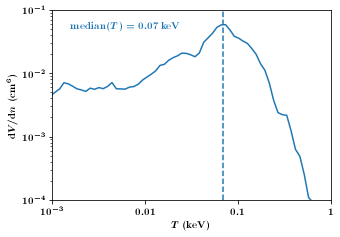

In [99]:
idx = np.where(dens < 5e-3)
T_med = np.median(tkeV[idx])
HT, edT = np.histogram(np.log10(tkeV[idx]),  bins=100, weights=vol[idx]/np.sum(vol[idx]))
ctrT = 0.5*(edT[1:]+edT[:-1])

fig, ax = plt.subplots(figsize=(5,3.5))
ax.semilogy(ctrT, HT, label="$n_\\mathrm{p}$", color="C0")
ax.set_xlabel("$T~(\\mathrm{keV})$")
ax.set_ylabel("$\\mathrm{d}V/\\mathrm{d}n~(\\mathrm{cm}^{6})$")
ax.set_ylim(1e-4,1e-1)
ax.set_xlim(-3,0)
ax.set_xticks([-3,-2,-1,0])
ax.set_xticklabels(["$10^{-3}$", "$0.01$", "$0.1$", "$1$"])
ax.plot([np.log10(T_med),np.log10(T_med)],[1e-4,1e-1],ls="--",color="C0")
ax.text(-2.8, 5e-2, "$\\mathrm{median}(T) = "+str(np.round(T_med,3))+"\\,\\mathrm{keV}$",color="C0")
fig.savefig("plots/temperature-pdf.pdf", bbox_inches="tight")